January 18th

The output of a neural network is a composition of functions of the weights, and the neural network problem is to choose the weights to approximate desired output data. So it is a minimization problem, so take derivative and set equal to zero (think first in one variable). Write it out as a Taylor series and omit higher order terms, get Newton's method. It is a linear problem so we make iterations and hope it converges -- converges when initial guess is close enough. 

To solve nonlinear problems: 
1. Get a linear approx and iterate it via Newton's method -- in higher dimensions, G'(x_0) is a Jacobian and it becomes a matrix problem.
2. If we're trying to find $g(w)-y=0$, find the l2 norm of that instead. Choose descent direction, and take a small step, iterate wishfully.
Today we'll solve linear problems directly and next week we'll solve descent problem:
1. LU -- lower upper (choose 1's on main diagonal in lower matrix); used by linalg.solve()
2. Cholesky -- LU in disguise: when A is symmetrix and positive definite, we see that LU = A = A^T = U^TL^T, get A=LU=L(DL^T), get ~L=LD^{1/2}. Preserves symmetry which LU does not do.
--> Both are very sensitive, kind bois, make a lot of errors which propogate forward and amplify.
3. QR --Q is unitary and R is rank-triangular (upper triangular) -- think Gram-Schmidt. Doesn't have to be square.
--> If problem is badly conditioned, QR doesn't compensate for it but it can handle it better, doesn't propogate as much.
4. SVD --singular values: U is mxm unitary, V is nxn unitary, and S is the mxn with singular values on diagonal, if A is real/symmetric, singular values = eigenvalues. Unlimited power! A need not be square. Also, we can throw away small singular values, improve condition number (called regularization).

The condition nunmber of a matrix A is the largest singular value divided by the smallest. This multiplier hits the errors and if the condition number is too big, we fall apart. 1-1000 is probably a fine condition number, above 5000, 10000 is going to lose precision IF it's able to solve it, and more than 10^14, it is junk.


January 25th 

We will likely load numpy, matpotlib, and scikit-learn.
There are different Python interpreters, such as CPython, Pypy-JIT, Cython. Cooper uses CPython with the Numba package for JIT commands.
Python is an interpreted language, which means you write it once and the interpreter handles different platforms, and it handles packages. It is also easier, but it is slower because we run and compile at the same time. It is also bigger, takes more space and probably can't work with super large arrays.
Python rewrites code file as bytecode (.py file ---> .pyc file).

There are several ways to import Numpy: 
    1. import numpy: x = numpy.linspace(0,1,101)
    2. import numpy as np: x = np.linspace(0,1,101)
    3. from numpy import \*: x = linspace(0,1,101)
Sympy has namespace conflicts with numpy, so we probably import sympy as sy or something.

x = linspace(0,1,101)
g = sin(x)\*\*2
from matplotlib.pyplot import \*
plot (x,g,'g')
show()

To make a partition, either use linspace or arange().

Python does all oprtations elementwise so if we need to do vector operations, we use numpy functions.

range() is better than arange() for running iterators in loops now that we're in Python 3

Equating array names now identifies starting locations of arrays like C does...

In [ ]:
from numpy import *
def fibon(Nterms=10):
    f0 = 1
    f1 = 1
    k = 0
    while k<Nterms:
        yield f0
        f0,f1 = f1,f0+f1
        k += 1

Feburary 1st 

Lots of slicing rules. Can index using arrays so long as they are the same size. The dimensional indices can be used if we impose a tuple as the outermost structure. Can also use negative indices, fun. Colon notation only works in indices though.

In [1]:
from numpy import *
dia = arange(3)
A = zeros((3,3,))
A[dia,dia] = -1
ind = ([0,1],[1,2]) 
A[ind] = 52
print(A)

[[-1. 52.  0.]
 [ 0. -1. 52.]
 [ 0.  0. -1.]]


The linalg sublibrary uses BLAS and LAPack to provide functionality. Matrix-matrix, matrix-vector and vector inner products can all be done using dot(,). It will be smart about the dimensions and throw a red flag if it doesn't. It can go both ways:

In [2]:
x = array([1,1,1])
y = dot(A,x)
print(y)
yAlt = A.dot(x) # would prefer to do this because it can make use of sparse storage for A
print(yAlt)
print(dot(x,A))
print(x.dot(A))
print(x.dot(A.T)) #transpose

[51. 51. -1.]
[51. 51. -1.]
[-1. 51. 51.]
[-1. 51. 51.]
[51. 51. -1.]


Numpy provides ways to solve, but it doesn't have a function for LU (Lower/Uppper) decomposition!

y = A.dot(x)
newX = linalg.solve(A,y)

But he does have one for Cholesky.

C = linalg.cholesky(A.T.dot(A))

If you really want LU, scipy has one:
import scipy.linalg
P,L,U = scipy.linalg(A)

Numpy does have the common orthogonal decompositions:

Q,R = linalg.qr(A), gives both unitary matrices as output in that order. More numerically stable but generally don't prefer it over LU. Also can give SVD:

U,S,Vt = linalg.svd(A); S is always diagonal so he just puts the singular values out as a single vector/list thingy.

He has a norm function, it is buried in linalg package: linalg.norm or linalg.matrix_norm maybe?

When reading in data, it's a pain:

import csv
def read_csv(filename):
    theInput = []
    data = csv.reader(open(filename,'r'))
    for row in data:
        theInput.append(row)
    return theInput

mydata = read_csv('covidvaccine.dat')

But more commonly we need to separate the data into floating point arrays:

state = []
percentInfection = []
percentMask = []
data = data = csv.reader(open('maskWearing.csv','r'))
for row in data:
    state.append(row[0])
    percentInfection.append(row[1])
    percentMask.append(row[2])
percentInfection = array(percentInfection).astype(float)
percentMask = array(percentMask).astype(float)

Object oriented programming. Create self-contained memory blocks together with instructions to maintain it. We can then create instances of that structure, assigned to variables. It organizes code for reuse. In industry, OOP is what everyone does. It also collates memory for one logical object and so it's most useful for very large programs (5,000 to 50,000 lines of code). We must be aware of the cache.


Every class needs a constructor - a function that is called whenever an instance of the class is created.

import scipy.stats as stats
class regressionLine:
    def __init__(self,xVals,yVals):
    self.xVals = xVals[:] #this makes 
    self.yVals = yVals[:]
    self.slope,self.intercept,self.rValue,self.pValue,self.stdErr = stats.linregress(xVals,yVals)
    
After that, we can make two instances of the class as e.g.:
import KlamathKenoMonthly as kkm
y1930 = regressionLine(kkm.data[:12,4],kk.data[:12,5])

A method is just a function but it's a function that belongs to a certain class. Go back up and add this function def to the class:

def plotRegression(self,xLabl='',yLabl='',titl=''):
    plot(self.xVals,self.yVals,'bp')
    plot(self.xVals,self.slope*self.xVals + self.intercept, 'r')
    stuff
    stuff I missed *
    
y1930.plotregression()

February 8th

Solve the linear system Ax=b by using additive decomposition of $A=L+D+U$, L is strictly lower part, U is strictly upper part, D is diagonal.

Jacobi: $Dx_k=y-(L+U)x_{k-1}$

Gauss-Seidel: $(L+D)x_k = y-Ux_{k-1}$

Successive OverRelaxation: $(D+\omega L)x_k = \omega y-(\omega U+(\omega-1)D]x_{k-1}$

Can use gradient descent to reach solution which minimizes $||Ax-y||_2^2$ but this can go fast in one direction and then slow down if we have a bad manafold. 

If A is symmetric and positive definite, we can use conjugate gradient: suppose we have a set of vectors which are orthogonal (conjugate) in the given inner product. Then we can forma  basis for the space and write the solution x to Ax=y. It is related to the spectral structure of A too, since the eigenvalues are positive and real and eigenvectors themselves orthogonal. But that's expensive so we will first step in a descent direction and then use a Gram-Schmidt procedure to choose the rest of the p vectors. So choose $p_0=(y-Ax_0)$ then define $x_1=x_0+\alpha_0p_0$ and minimize along that line, so any remaining residual is orthogonal to that subspace AND then we iterate with Gram Schmidt.

MINRES does conjugate gradient when it can and regularizes when it can't; GMRES does 

You can pre-condition the matrix so that things go more quickly.

February 15

Go to https://archive.ics.uci.edu/ml/datasets.php

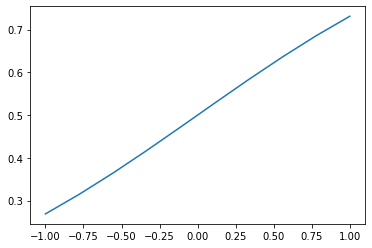

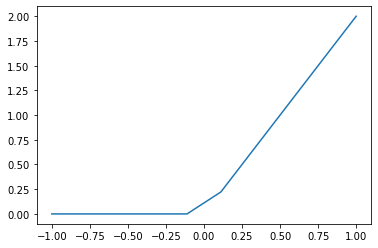

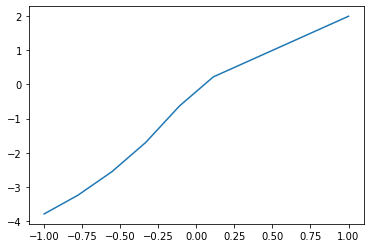

In [45]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(x,a0(x))
plt.figure(2)
import matplotlib.pyplot as plt
plt.plot(x,a1(x,2))
plt.figure(3)
import matplotlib.pyplot as plt
plt.plot(x,a2(x,2,3))